In [1]:
from pymc3 import Binomial, Normal, Poisson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
daily_precip = pd.read_csv("../data/daily_mean_precip_2017-06-03.csv", parse_dates=['date'])
print(daily_precip.info())
daily_precip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 6 columns):
date             2736 non-null datetime64[ns]
year             2736 non-null int64
month            2736 non-null int64
day              2736 non-null int64
totalPrecipMM    2736 non-null float64
totalRainMM      2736 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 128.3 KB
None


,date,year,month,day,totalPrecipMM,totalRainMM
0,2010-01-01,2010,1,1,4.9,0.0
1,2010-01-02,2010,1,2,4.1,0.0
2,2010-01-03,2010,1,3,1.1,0.0
3,2010-01-04,2010,1,4,0.5,0.0
4,2010-01-05,2010,1,5,0.0,0.0


Calculate the number of days in a week where there was some observed precipitation

In [3]:
precip_days = daily_precip[['date', 'totalPrecipMM']].set_index('date').resample('1W').apply(
  lambda x: np.count_nonzero(x)).astype(int)
precip_days.head()

,totalPrecipMM
date,
2010-01-03,3
2010-01-10,4
2010-01-17,2
2010-01-24,3
2010-01-31,6


In [4]:
precip_days.rename(columns={'totalPrecipMM': 'numberOfPrecipDays'}, inplace=True)
precip_days.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numberOfPrecipDays,392.0,3.484694,1.855322,0.0,2.0,3.0,5.0,7.0


How is it distributed?

/Users/calvindelima/anaconda/envs/py35-ds/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


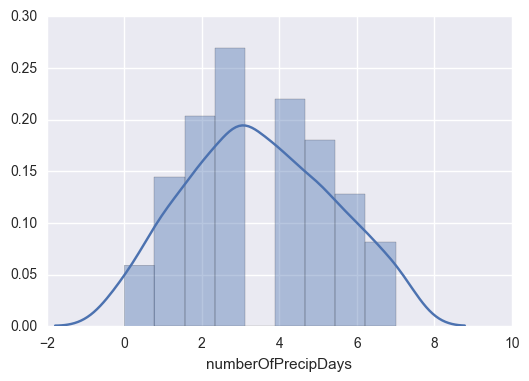

In [5]:
sns.distplot(precip_days.numberOfPrecipDays, kde=True)

Specify a binomial model

In [8]:
from pymc3 import Model, Uniform

with Model() as binom_model:
    p = Uniform('p', 0, 1)

Model the likelihood

In [9]:
with binom_model: 
    y = Binomial('y', p=p, n=7, observed=precip_days.numberOfPrecipDays)

Fit the model

In [20]:
from pymc3 import fit

with binom_model:
    samples = fit(random_seed=1234).sample(precip_samples.shape[0])

Average Loss = 862.71: 100%|██████████| 10000/10000 [00:00<00:00, 12340.00it/s]
Finished [100%]: Average Loss = 862.68


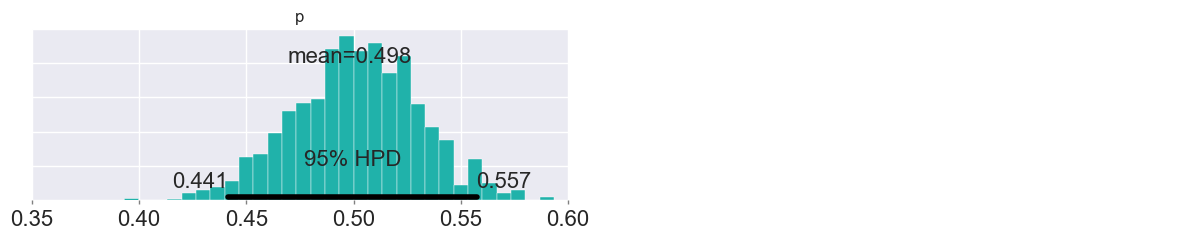

In [21]:
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['p'], color='LightSeaGreen');

In [22]:
ps = samples['p']
# sigmas = samples['σ']

In [23]:
precip_samples = Binomial.dist(p=ps, n=7).random()